## PROBLEM 1: First Look at Stata - Crime and Education Data 
### Step 1:	
The excel file “Crime and Dropout Data” contains violent crime rates (per 100k population in 2022) and high school dropout rates (% of grade 9-12 students who do not graduate in 2009) by state.  Copy all three columns from Excel into the Stata Data Browser.

In [3]:
import pandas as pd
from IPython.display import display

In [4]:
df = pd.read_excel("./Crime and Dropout Data.xlsx")

## Step 2: 	
In Stata, go to “Data” - “Data Utilities” - “Label Utilities” - “Label Variable” to add descriptive labels to each variable indicating units of measurement and year.

In [5]:
newNames = ["Crime Rate in 2022 (Crimes / Total Pop.)", "Dropout Rate in 2009 (%)"]
oldNames = df.columns[1:]
display_df = df.rename(columns=dict(zip(oldNames, newNames)))
display(df)

,State,CrimeRate2022,DropoutRate2009
0,District of Columbia,812.3,7.001
1,New Mexico,780.5,6.873
2,Alaska,758.9,6.906
3,Arkansas,645.3,3.588
4,Louisiana,628.6,4.808
5,Tennessee,621.6,2.652
6,California,499.5,4.646
7,Colorado,492.5,5.349
8,South Carolina,491.3,2.971
9,Missouri,488.0,3.516



## Step 3: 	
Use the command “sum crimerate2022 dropoutrate2009” to generate the table of summary statistics. Show the table below. Which states have the min and max values of each variable?

In [6]:
summary = df.describe()
display(summary)

,CrimeRate2022,DropoutRate2009
count,51.000000,51.000000
mean,368.688235,3.595686
std,161.469457,1.644449
min,103.300000,1.190000
25%,259.250000,2.355500
50%,342.400000,3.356000
75%,431.700000,4.406500
max,812.300000,7.833000


In [7]:
max = summary.loc['max']
min = summary.loc['min']

In [8]:
maxCR = max.loc['CrimeRate2022']
maxDR = max.loc['DropoutRate2009']

In [9]:
minCR = min.loc['CrimeRate2022']
minDR = min.loc['DropoutRate2009']

In [10]:
maxCRState = df[df['CrimeRate2022'] == maxCR]['State'].to_string(index=False)
maxDRState = df[df['DropoutRate2009'] == maxDR]['State'].to_string(index=False)
print(f"""
      Max:
      Crime Rate: {maxCRState}
      Dropout Rate: {maxDRState}
      """)
minCRState = df[df['CrimeRate2022'] == minCR]['State'].to_string(index=False)
minDRState = df[df['DropoutRate2009'] == minDR]['State'].to_string(index=False)
print(f"""
      Min:
      Crime Rate: {minCRState}
      Dropout Rate: {minDRState}
      """)


      Max:
      Crime Rate: District of Columbia
      Dropout Rate: Arizona
      

      Min:
      Crime Rate: Maine
      Dropout Rate: New Hampshire
      


## Step 4:	
Use the command “scatter crimerate2022 dropoutrate2009” to create the scatter plot relating crime rate to dropout rate across states. Show the graph below. How would you characterize the relationship between the variables? Does it make sense given the lag in time between the X variable (dropout rate) and Y variable (crime rate)?

In [11]:
import matplotlib.pyplot as plt
import numpy as np

In [12]:
y,x = df['CrimeRate2022'], df['DropoutRate2009']
coefficients = np.polyfit(x, y, 1)
bfl = np.poly1d(coefficients)
x_vals = np.linspace(x.min(), x.max(), 100)

Text(0, 0.5, 'CrimeRate2022')

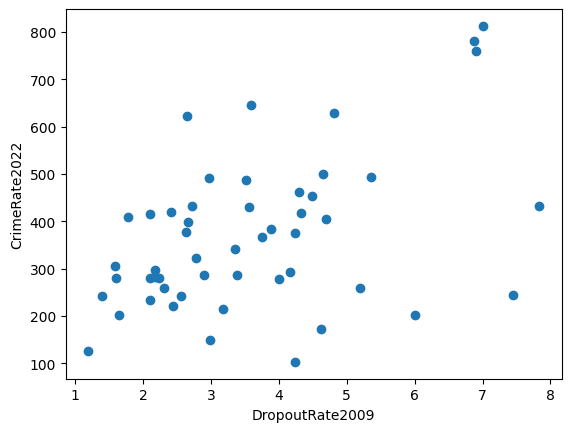

In [18]:
plt.scatter(x,y)
plt.xlabel(df.columns[2])
plt.ylabel(df.columns[1])

## Step 5:	Let’s ask Stata to recreate the scatter plot and this time include the linear “best fit” line between the two variables.
Use the following command: “twoway (scatter crimerate2022 dropoutrate2009)(lfit crimerate2022 dropoutrate2009)”
Include the graph below.
What is the approximate intercept term (B-zero-hat)? Interpret the value.
What is the approximate slope term (B-one-hat)? Interpret the value.
Write the approximate regression prediction equation corresponding to the best fit plot.

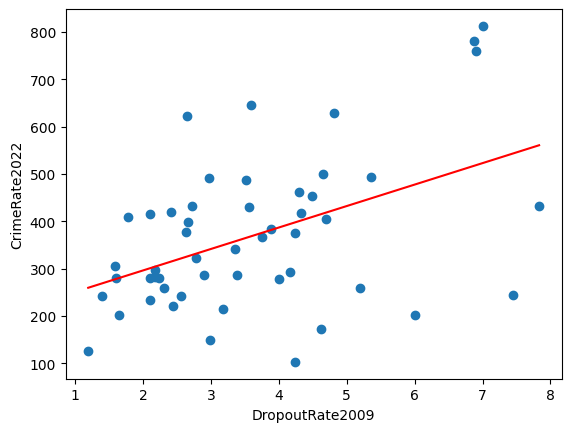

In [16]:
plt.scatter(x,y)
plt.xlabel(df.columns[2])
plt.ylabel(df.columns[1])
plt.plot(x_vals, bfl(x_vals), color='red', label='Best Fit Line')

In [14]:
bflM, bflB = coefficients
hat = '\u0302'
subzero = '\u2080'
subone = '\u2081'
b_hat_zero = '\u0302b\u2080'
b_hat_one = '\u0302b\u2081'
y_hat = 'y\u0302'
x_one = 'x\u2081'

print(f"y{hat} = {bflB} + {bflM}x{subone}")
print(
f"""where {hat}b{subzero} = {bflB}
and {hat}b{subone} = {bflM} 
      """)

ŷ = 205.90707941978548 + 45.271234319941854x₁
where ̂b₀ = 205.90707941978548
and ̂b₁ = 45.271234319941854 
      
